# Investigating Alzheimer's Disease

**Purpose:** identify risk factors and symptoms associated with Alzheimer's Disease

**Outcome:** evaluate effects of Alzheimer's Disease on the lives of patients and build a model to estimate the risk of having Alzheimer's Disease

##Data

**Source:** Data is taken from a published dataset on Kaggle containing extensive health information taken from 2149 patients

###**Data structure:**

1. Patient information

**PatientID:** Unique ID of each patient

**Age:** Age in years

**Gender:** Gender, with 0 representing Male and 1 representing Female

**Ethnicity:** Ethnic group, with 0 representing Caucasian, 1 representing African-American, 2 representing Asian and 3 representing Other

EducationLevel: Education level, with 0 representing None, 1 representing High School, 2 representing Bachelor's, 3 representing Higher

2. Lifestyle factors

**BMI:** Body Mass Index of each patient

**Smoking:** Smoking status, with 0 representing No and 1 representing Yes

**AlcoholConsumption:** Weekly alcohol consumption in units

**PhysicalActivity:** Weekly physical activity in hours

**DietQuality:** Diet quality score, evaluated on a scale of 10

**SleepQuality:** Sleep quality score, evaluated on a scale of 10

3. Medical history

**FamilyHistoryAlzheimers:** Family history of Alzheimer's Disease, with 0 representing No and 1 representing Yes

**CardiovascularDisease:** Presence of cardiovascular disease, with 0 representing No and 1 representing Yes

**Diabetes:** Presence of diabetes, with 0 representing No and 1 representing Yes

**Depression:** Presence of depression, with 0 representing No and 1 representing Yes

**HeadInjury:** History of head injury, with 0 representing No and 1 representing Yes

**Hypertension:** Presence of hypertension, with 0 representing No and 1 representing Yes

4. Clinical measurements

**SystolicBP:** Systolic blood pressure, measured in mmHg

**DiastolicBP:** Diastolic blood pressure, measured in mmHg

**CholesterolTotal:** Total cholesterol levels, measured in mg/dL

**CholesterolLDL:** Low-density lipoprotein cholesterol levels, measured in mg/dL

**CholesterolHDL:** High-density lipoprotein cholesterol levels, measured in mg/dL

**CholesterolTriglycerides:** Triglycerides levels, measured in mg/dL

5. Cognitive and functional assessment

**MMSE:** Mini-Mental State Examination score, evaluated on a scale of 30

**FunctionalAssessment:** Functional assessment score, evaluated on a scale of 10

**MemoryComplaints:** Presence of memory complaints, with 0 representing No and 1 representing Yes

**BehavioralProblems:** Presence of behavioral problems, with 0 representing No and 1 representing Yes

**ADL:** Activities of Daily Living score, evaluated on a scale of 10

6. Symptoms

**Confusion:** Presence of confusion, with 0 representing No and 1 representing Yes

**Disorientation:** Presence of disorientation, with 0 representing No and 1 representing Yes

**PersonalityChanges:** Presence of personality changes, with 0 representing No and 1 representing Yes

**DifficultyCompletingTasks:** Presence of difficulty completing tasks, with 0 representing No and 1 representing Yes

**Forgetfulness:** Presence of forgetfulness, with 0 representing No and 1 representing Yes

7. Others

**Diagnosis:** Diagnosis status for Alzheimer's Disease, with 0 representing No and 1 representing Yes

**DoctorInCharge:** The doctor in charge, with "XXXConfid" as the value for all patients. This is confidential information and will be excluded from analysis

##Analysis

In [1]:
#import needed libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import data
url = 'https://docs.google.com/spreadsheets/d/' + '1o6_3mHXLJKoUKQYMthK-oJw3mDyWP4f_yUyAqjaWzus' + '/export?format=xlsx'
data = pd.read_excel(url, sheet_name='Data')

In [3]:
#brief overview of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

There is no empty value in the dataset, however some categorical columns are set to numerical. The confidential column DoctorInCharge should also be deleted

In [4]:
#fix data types and delete DoctorInCharge
data['Gender'] = data['Gender'].astype('category')
data['Ethnicity'] = data['Ethnicity'].astype('category')
data['EducationLevel'] = data['EducationLevel'].astype('category')
data['Smoking'] = data['Smoking'].astype('category')
data['FamilyHistoryAlzheimers'] = data['FamilyHistoryAlzheimers'].astype('category')
data['CardiovascularDisease'] = data['CardiovascularDisease'].astype('category')
data['Diabetes'] = data['Diabetes'].astype('category')
data['Depression'] = data['Depression'].astype('category')
data['HeadInjury'] = data['HeadInjury'].astype('category')
data['Hypertension'] = data['Hypertension'].astype('category')
data['MemoryComplaints'] = data['MemoryComplaints'].astype('category')
data['BehavioralProblems'] = data['BehavioralProblems'].astype('category')
data['Confusion'] = data['Confusion'].astype('category')
data['Disorientation'] = data['Disorientation'].astype('category')
data['PersonalityChanges'] = data['PersonalityChanges'].astype('category')
data['DifficultyCompletingTasks'] = data['DifficultyCompletingTasks'].astype('category')
data['Forgetfulness'] = data['Forgetfulness'].astype('category')
data['Diagnosis'] = data['Diagnosis'].astype('category')
del data['DoctorInCharge']

In [5]:
#check that data types are fixed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   PatientID                  2149 non-null   int64   
 1   Age                        2149 non-null   int64   
 2   Gender                     2149 non-null   category
 3   Ethnicity                  2149 non-null   category
 4   EducationLevel             2149 non-null   category
 5   BMI                        2149 non-null   float64 
 6   Smoking                    2149 non-null   category
 7   AlcoholConsumption         2149 non-null   float64 
 8   PhysicalActivity           2149 non-null   float64 
 9   DietQuality                2149 non-null   float64 
 10  SleepQuality               2149 non-null   float64 
 11  FamilyHistoryAlzheimers    2149 non-null   category
 12  CardiovascularDisease      2149 non-null   category
 13  Diabetes                   2149 n

Since the analysis focuses on differences between Alzheimer's and non Alzheimer's group, the data is split into 2

In [6]:
#split into 2 groups
Alzheimers = data[data['Diagnosis'] == 1]
NonAlzheimers = data[data['Diagnosis'] == 0]

Brief overview of demographic details of the patients included in the dataset

In [7]:
#overall demographic details
data[['Age', 'Gender', 'Ethnicity', 'EducationLevel']].describe(include='all')

,Age,Gender,Ethnicity,EducationLevel
count,2149.000000,2149.0,2149.0,2149.0
unique,NaN,2.0,4.0,4.0
top,NaN,1.0,0.0,1.0
freq,NaN,1088.0,1278.0,854.0
mean,74.908795,NaN,NaN,NaN
std,8.990221,NaN,NaN,NaN
min,60.000000,NaN,NaN,NaN
25%,67.000000,NaN,NaN,NaN
50%,75.000000,NaN,NaN,NaN
75%,83.000000,NaN,NaN,NaN


In [8]:
#more detailed
print(data.pivot_table(index=['Gender'], values=['PatientID'], aggfunc='count'))
print(data.pivot_table(index=['Ethnicity'], values=['PatientID'], aggfunc='count'))
print(data.pivot_table(index=['EducationLevel'], values=['PatientID'], aggfunc='count'))

        PatientID
Gender           
0            1061
1            1088
           PatientID
Ethnicity           
0               1278
1                454
2                206
3                211
                PatientID
EducationLevel           
0                     446
1                     854
2                     636
3                     213


Age of patients range from 60 to 90, with a mean of 75

Genders are equally distributed

The majority of patients are caucasian (59%), followed by African-American (21%), with a small proportion of Asian (10%) and other ethnicities (10%). This means the results could be biased towards Caucasian and should be considered carefully before applying to other ethnic groups

Most patients have finished High School (40%) or Bachelor's study (30%) , some does not complete a diploma (20%) and even fewer having a Master's degree or higher (10%)

In [9]:
#comparison of demographic details
print(Alzheimers[['Age', 'Gender', 'Ethnicity', 'EducationLevel']].describe(include='all'))
print(NonAlzheimers[['Age', 'Gender', 'Ethnicity', 'EducationLevel']].describe(include='all'))

               Age  Gender  Ethnicity  EducationLevel
count   760.000000   760.0      760.0           760.0
unique         NaN     2.0        4.0             4.0
top            NaN     0.0        0.0             1.0
freq           NaN   386.0      463.0           302.0
mean     74.842105     NaN        NaN             NaN
std       9.149977     NaN        NaN             NaN
min      60.000000     NaN        NaN             NaN
25%      67.000000     NaN        NaN             NaN
50%      75.000000     NaN        NaN             NaN
75%      83.000000     NaN        NaN             NaN
max      90.000000     NaN        NaN             NaN
                Age  Gender  Ethnicity  EducationLevel
count   1389.000000  1389.0     1389.0          1389.0
unique          NaN     2.0        4.0             4.0
top             NaN     1.0        0.0             1.0
freq            NaN   714.0      815.0           552.0
mean      74.945284     NaN        NaN             NaN
std        8.904709   

Distribution and range of ages as well as distribution of genders are very similar

In [10]:
def pivottable_piechart(data, index, column, labels):
  pivottable = data.pivot_table(index=[index], values=[column], aggfunc='count')
  print(pivottable)
  plt.pie(pivottable[column], labels=labels)
  plt.show()

           PatientID
Ethnicity           
0                463
1                146
2                 84
3                 67


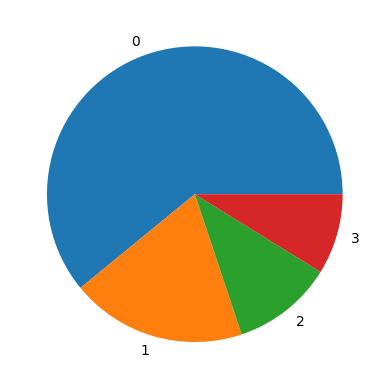

           PatientID
Ethnicity           
0                815
1                308
2                122
3                144


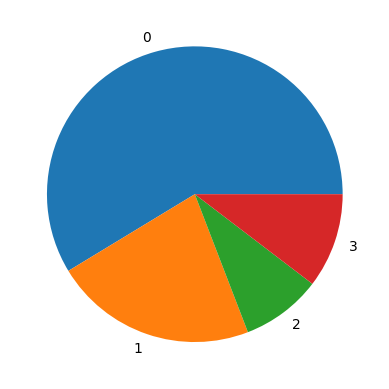

In [11]:
ethnicity_labels = ['0', '1', '2', '3']
pivottable_piechart(Alzheimers, 'Ethnicity', 'PatientID', ethnicity_labels)
pivottable_piechart(NonAlzheimers, 'Ethnicity', 'PatientID', ethnicity_labels)

                PatientID
EducationLevel           
0                     174
1                     302
2                     217
3                      67


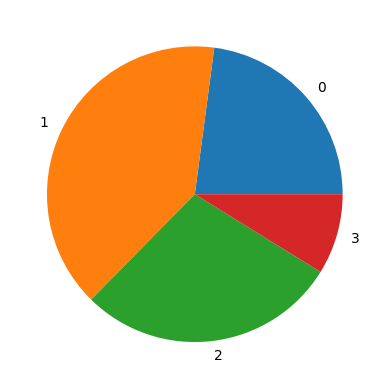

                PatientID
EducationLevel           
0                     272
1                     552
2                     419
3                     146


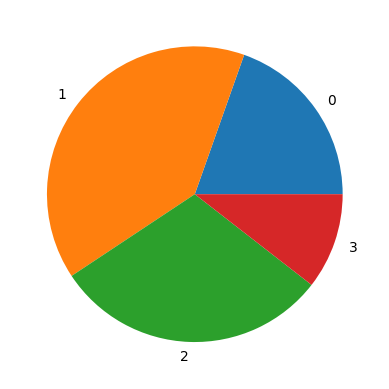

In [12]:
education_labels = ['0', '1', '2', '3']
pivottable_piechart(Alzheimers, 'EducationLevel', 'PatientID', ethnicity_labels)
pivottable_piechart(NonAlzheimers, 'EducationLevel', 'PatientID', ethnicity_labels)

There is also no significant differences in the distribution of ethnicities and education levels

Overall, the 2 groups have very similar geographic distribution

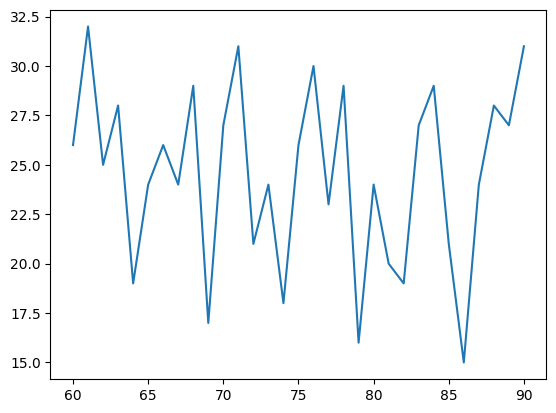

In [78]:
#personality changes over ages
Alzheimers_age = Alzheimers.pivot_table(index=['Age'], values=['PatientID'], aggfunc='count').reset_index()
x = Alzheimers_age['Age']
y = Alzheimers_age['PatientID']
plt.plot(x, y)
plt.show()

In [13]:
#comparison of lifestyle factors
print(Alzheimers[['BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality']].describe(include='all'))
print(NonAlzheimers[['BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality']].describe(include='all'))

               BMI  Smoking  AlcoholConsumption  PhysicalActivity  \
count   760.000000    760.0          760.000000        760.000000   
unique         NaN      2.0                 NaN               NaN   
top            NaN      0.0                 NaN               NaN   
freq           NaN    543.0                 NaN               NaN   
mean     27.912670      NaN            9.980156          4.943160   
std       7.298765      NaN            5.769338          2.836046   
min      15.018240      NaN            0.065286          0.019957   
25%      21.684882      NaN            4.802623          2.632883   
50%      28.004793      NaN            9.860342          4.845318   
75%      34.449386      NaN           15.190361          7.374699   
max      39.992767      NaN           19.988291          9.985069   

        DietQuality  SleepQuality  
count    760.000000    760.000000  
unique          NaN           NaN  
top             NaN           NaN  
freq            NaN        

Lifestyle factors are also very similar. There is like no/very little correlation between these factors and Alzheimer's Disease

In [14]:
#comparison of medical history
print(Alzheimers[['FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension']].describe(include='all'))
print(NonAlzheimers[['FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension']].describe(include='all'))

        FamilyHistoryAlzheimers  CardiovascularDisease  Diabetes  Depression  \
count                       760                    760       760         760   
unique                        2                      2         2           2   
top                           0                      0         0           0   
freq                        583                    639       657         610   

        HeadInjury  Hypertension  
count          760           760  
unique           2             2  
top              0             0  
freq           696           634  
        FamilyHistoryAlzheimers  CardiovascularDisease  Diabetes  Depression  \
count                      1389                   1389      1389        1389   
unique                        2                      2         2           2   
top                           0                      0         0           0   
freq                       1024                   1200      1168        1108   

        HeadInjury  Hyp

In [15]:
total_alzheimers = Alzheimers['PatientID'].count()
total_nonalzheimers = NonAlzheimers['PatientID'].count()
def percentage(group, column, total):
  count = group[group[column] == 1]['PatientID'].count()
  print(f'Percentage with {column}: {count / total * 100}')

                         PatientID
FamilyHistoryAlzheimers           
0                              583
1                              177


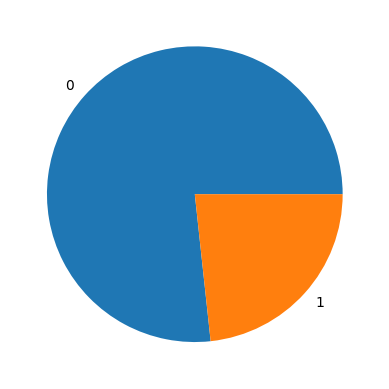

Percentage with FamilyHistoryAlzheimers: 23.289473684210527
                         PatientID
FamilyHistoryAlzheimers           
0                             1024
1                              365


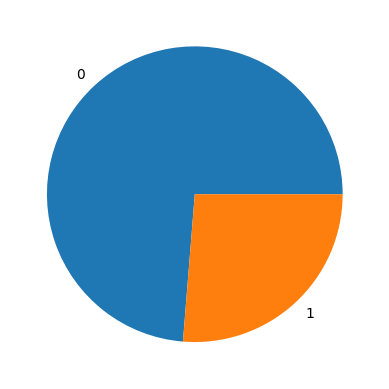

Percentage with FamilyHistoryAlzheimers: 26.277897768178544
                       PatientID
CardiovascularDisease           
0                            639
1                            121


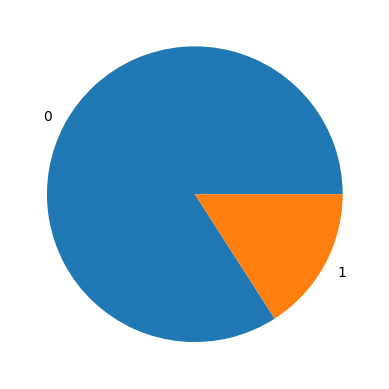

Percentage with CardiovascularDisease: 15.921052631578947
                       PatientID
CardiovascularDisease           
0                           1200
1                            189


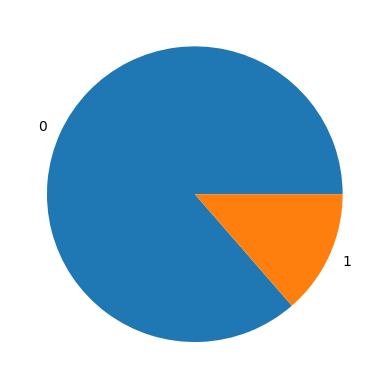

Percentage with CardiovascularDisease: 13.606911447084233
          PatientID
Diabetes           
0               657
1               103


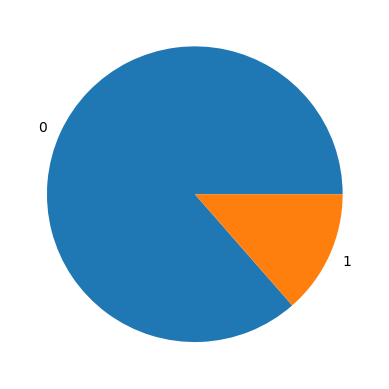

Percentage with Diabetes: 13.552631578947368
          PatientID
Diabetes           
0              1168
1               221


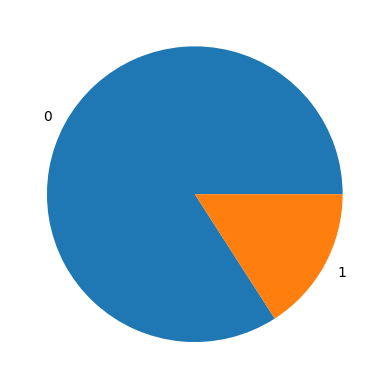

Percentage with Diabetes: 15.910727141828653
            PatientID
Depression           
0                 610
1                 150


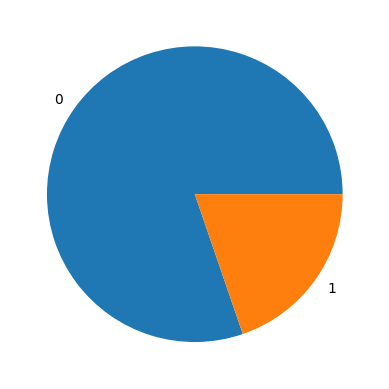

Percentage with Depression: 19.736842105263158
            PatientID
Depression           
0                1108
1                 281


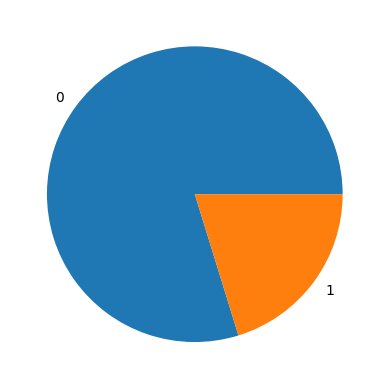

Percentage with Depression: 20.230381569474442
            PatientID
HeadInjury           
0                 696
1                  64


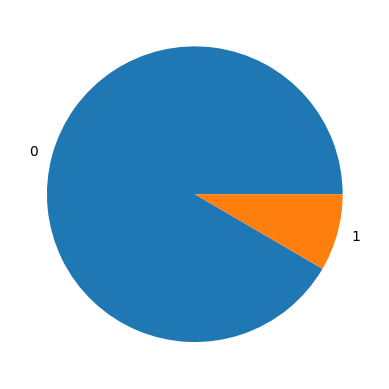

Percentage with HeadInjury: 8.421052631578947
            PatientID
HeadInjury           
0                1254
1                 135


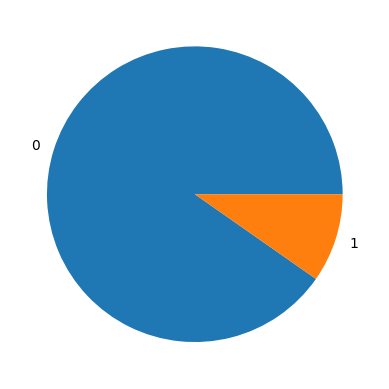

Percentage with HeadInjury: 9.719222462203025
              PatientID
Hypertension           
0                   634
1                   126


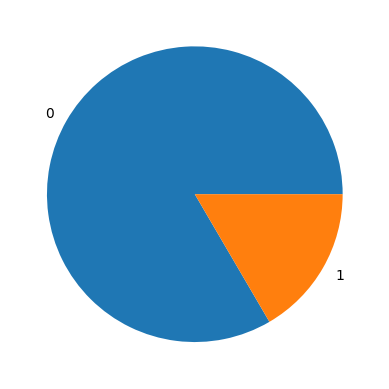

Percentage with Hypertension: 16.57894736842105
              PatientID
Hypertension           
0                  1195
1                   194


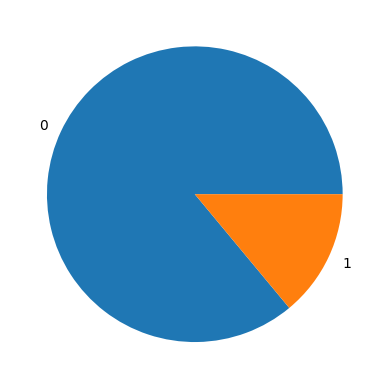

Percentage with Hypertension: 13.96688264938805


In [16]:
medical_history_labels = ['0', '1']
medical_history = ['FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension']
for i in range(6):
  pivottable_piechart(Alzheimers, medical_history[i], 'PatientID', medical_history_labels)
  percentage(Alzheimers, medical_history[i], total_alzheimers)
  pivottable_piechart(NonAlzheimers, medical_history[i], 'PatientID', medical_history_labels)
  percentage(NonAlzheimers, medical_history[i], total_nonalzheimers)

There are some very minor differences in 2 groups. Whether these differences affect the chance of having Alzheimer's need to be evaluated further on the in analysis

Interestingly, the percentage of patients with family history of Alzheimer's is slightly lower in the Alzheimer's group

In [ ]:
#comparison of clinical measurements
print(Alzheimers[['SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides']].describe(include='all'))
print(NonAlzheimers[['SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides']].describe(include='all'))

       SystolicBP  DiastolicBP  CholesterolTotal  CholesterolLDL  \
count  760.000000   760.000000        760.000000      760.000000   
mean   133.717105    89.973684        225.565197      122.461726   
std     25.962885    17.458231         43.192207       43.231730   
min     90.000000    60.000000        150.212650       50.430083   
25%    112.000000    74.000000        188.747243       85.195865   
50%    133.000000    91.000000        226.448082      121.803389   
75%    156.000000   105.000000        262.805195      160.046948   
max    179.000000   119.000000        299.959991      199.965665   

       CholesterolHDL  CholesterolTriglycerides  
count      760.000000                760.000000  
mean        60.795330                231.406671  
std         23.236805                102.115973  
min         20.015125                 50.461611  
25%         39.687037                140.034382  
50%         61.847228                239.618889  
75%         80.565846                

Most of these measurements are very similar, so these measures likely have minimal effects on the whether the patient suffers from Alzheimer's

Measurements with the greatest difference are CholesterolLDL and CholesterolTriglycerides, however there should be further analysis before a conclusion can be made

In [17]:
#comparison of cognitive and functional assessment
print(Alzheimers[['MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL']].describe(include='all'))
print(NonAlzheimers[['MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL']].describe(include='all'))

              MMSE  FunctionalAssessment  MemoryComplaints  \
count   760.000000            760.000000             760.0   
unique         NaN                   NaN               2.0   
top            NaN                   NaN               0.0   
freq           NaN                   NaN             474.0   
mean     11.994657              3.653380               NaN   
std       7.225532              2.566685               NaN   
min       0.050624              0.000460               NaN   
25%       6.040483              1.576868               NaN   
50%      11.565835              3.299060               NaN   
75%      18.151993              4.920710               NaN   
max      29.959425              9.927945               NaN   

        BehavioralProblems         ADL  
count                760.0  760.000000  
unique                 2.0         NaN  
top                    0.0         NaN  
freq                 557.0         NaN  
mean                   NaN    3.657938  
std      

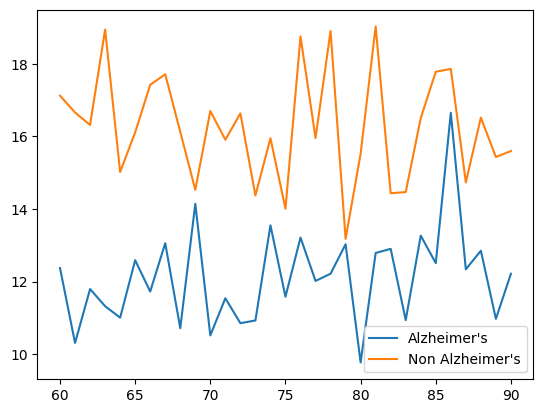

In [60]:
#MMSE over age
Alzheimers_MMSE = Alzheimers.pivot_table(index=['Age'], values=['MMSE'], aggfunc='mean').reset_index()
x1 = Alzheimers_MMSE['Age']
y1 = Alzheimers_MMSE['MMSE']
NonAlzheimers_MMSE = NonAlzheimers.pivot_table(index=['Age'], values=['MMSE'], aggfunc='mean').reset_index()
x2 = NonAlzheimers_MMSE['Age']
y2 = NonAlzheimers_MMSE['MMSE']
plt.plot(x1, y1, label="Alzheimer's")
plt.plot(x2, y2, label="Non Alzheimer's")
plt.legend()
plt.show()

MMSE scores of Alzheimer's group was lower in all ages

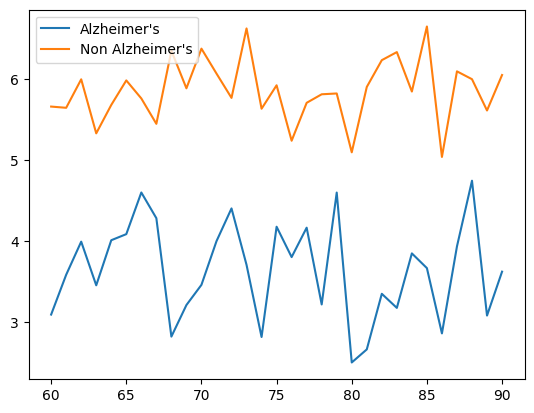

In [61]:
#functional assessment over age
Alzheimers_functional = Alzheimers.pivot_table(index=['Age'], values=['FunctionalAssessment'], aggfunc='mean').reset_index()
x1 = Alzheimers_functional['Age']
y1 = Alzheimers_functional['FunctionalAssessment']
NonAlzheimers_functional = NonAlzheimers.pivot_table(index=['Age'], values=['FunctionalAssessment'], aggfunc='mean').reset_index()
x2 = NonAlzheimers_functional['Age']
y2 = NonAlzheimers_functional['FunctionalAssessment']
plt.plot(x1, y1, label="Alzheimer's")
plt.plot(x2, y2, label="Non Alzheimer's")
plt.legend()
plt.show()

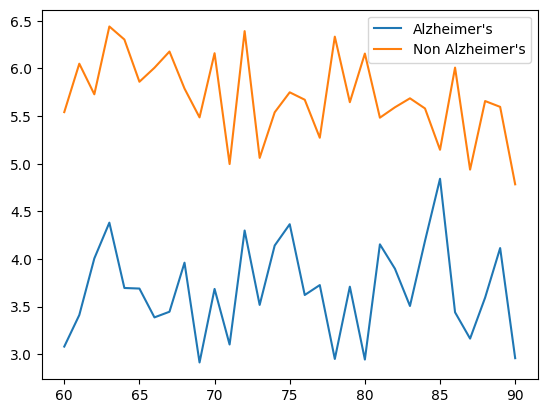

In [62]:
#ADL over age
Alzheimers_ADL = Alzheimers.pivot_table(index=['Age'], values=['ADL'], aggfunc='mean').reset_index()
x1 = Alzheimers_ADL['Age']
y1 = Alzheimers_ADL['ADL']
NonAlzheimers_ADL = NonAlzheimers.pivot_table(index=['Age'], values=['ADL'], aggfunc='mean').reset_index()
x2 = NonAlzheimers_ADL['Age']
y2 = NonAlzheimers_ADL['ADL']
plt.plot(x1, y1, label="Alzheimer's")
plt.plot(x2, y2, label="Non Alzheimer's")
plt.legend()
plt.show()

The same applies for functional assessment and ADL

In [18]:
def histogram(table, column):
  plt.hist(table[column], bins=10, edgecolor='white')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

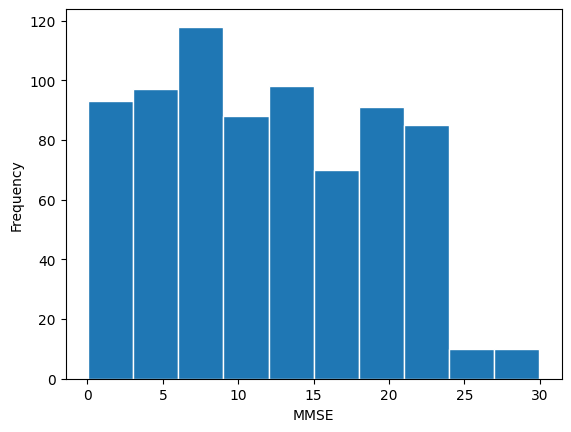

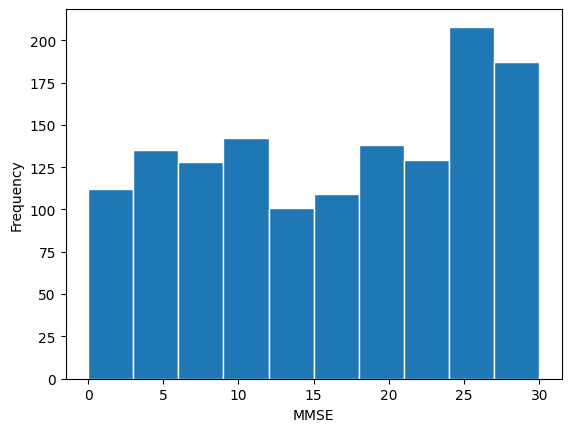

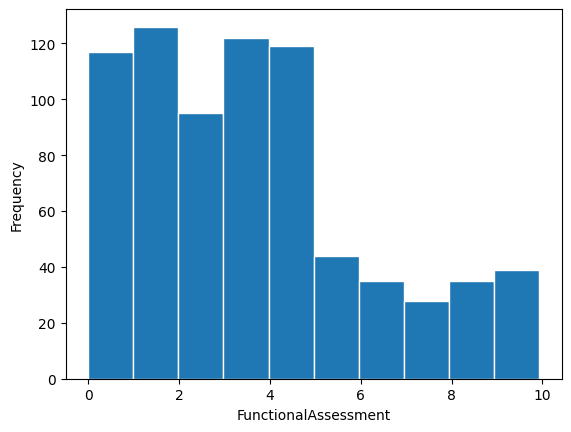

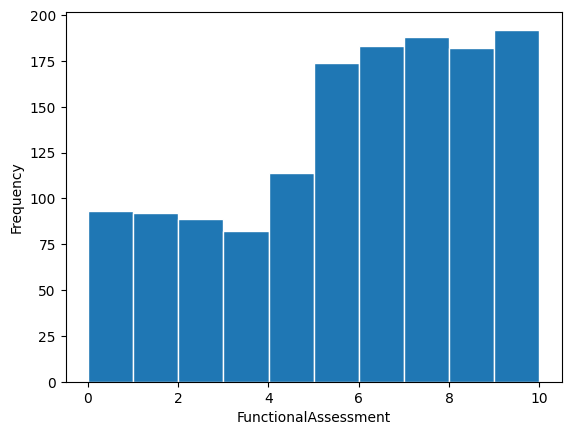

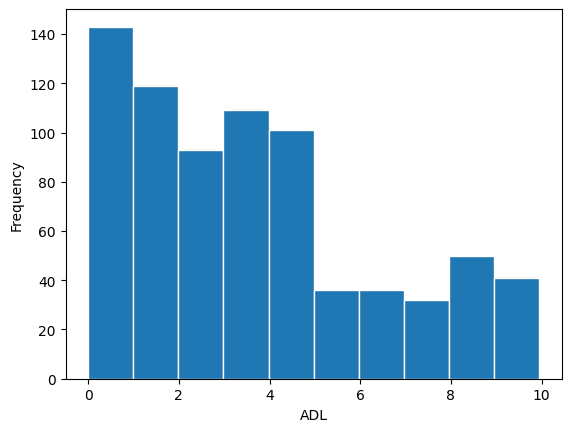

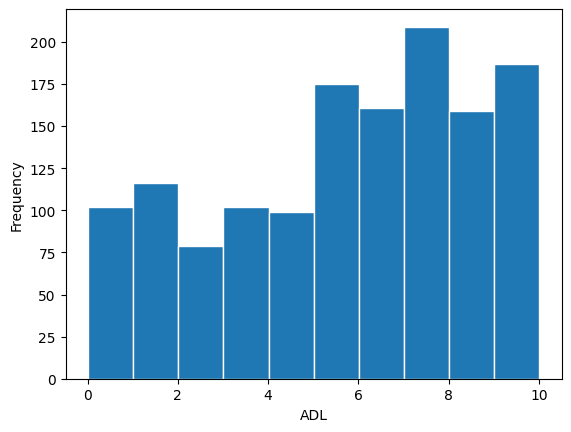

In [19]:
#comparison of cognitive and functional assessment
cognitive_functional_measures = ['MMSE', 'FunctionalAssessment', 'ADL']
for i in range(3):
  histogram(Alzheimers, cognitive_functional_measures[i])
  histogram(NonAlzheimers, cognitive_functional_measures[i])

This is the category with the greatest difference and is likely the factors that have the most effects on whether a patient has Alzheimer's Disease:

1. Very few in Alzheimer's group has MMSE score of above 25, while there is a more even distribution in non Alzheimer's group, with many patients scoring over 25

2. There is also a clear split in functional assessment and ADL scores: a large portion of patients in Alzheimer's group has a score of below 5, the opposite of non Alzheimer's group

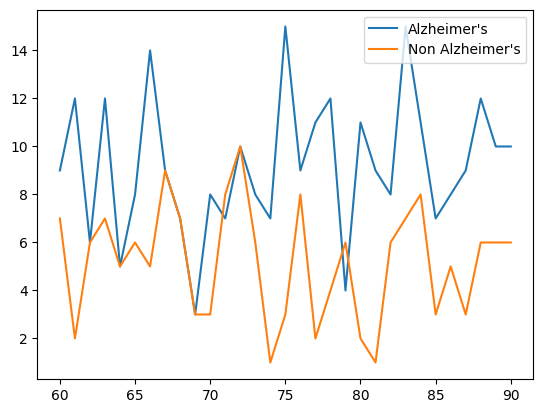

In [70]:
#memory complaints over ages
Alzheimers_memory = Alzheimers[Alzheimers['MemoryComplaints'] == 1].pivot_table(index=['Age'], values=['MemoryComplaints'], aggfunc='count').reset_index()
x1 = Alzheimers_memory['Age']
y1 = Alzheimers_memory['MemoryComplaints']
NonAlzheimers_memory = NonAlzheimers[NonAlzheimers['MemoryComplaints'] == 1].pivot_table(index=['Age'], values=['MemoryComplaints'], aggfunc='count').reset_index()
x2 = NonAlzheimers_memory['Age']
y2 = NonAlzheimers_memory['MemoryComplaints']
plt.plot(x1, y1, label="Alzheimer's")
plt.plot(x2, y2, label="Non Alzheimer's")
plt.legend()
plt.show()

Mean cases of memory complaints is higher in Alzheimer's group in almost all ages

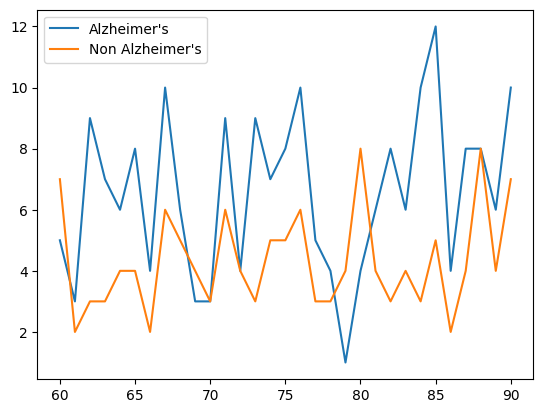

In [71]:
#behavioral problems over ages
Alzheimers_behavior = Alzheimers[Alzheimers['BehavioralProblems'] == 1].pivot_table(index=['Age'], values=['BehavioralProblems'], aggfunc='count').reset_index()
x1 = Alzheimers_behavior['Age']
y1 = Alzheimers_behavior['BehavioralProblems']
NonAlzheimers_behavior = NonAlzheimers[NonAlzheimers['BehavioralProblems'] == 1].pivot_table(index=['Age'], values=['BehavioralProblems'], aggfunc='count').reset_index()
x2 = NonAlzheimers_behavior['Age']
y2 = NonAlzheimers_behavior['BehavioralProblems']
plt.plot(x1, y1, label="Alzheimer's")
plt.plot(x2, y2, label="Non Alzheimer's")
plt.legend()
plt.show()

Mean cases of behavioral problems is higher in Alzheimer's group in most ages

                  PatientID
MemoryComplaints           
0                       474
1                       286


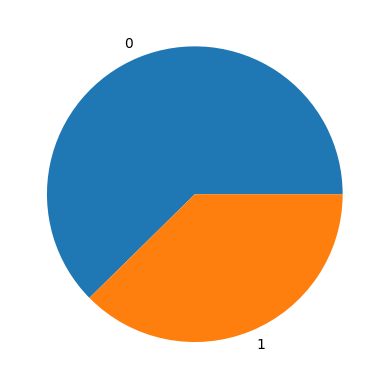

Percentage with MemoryComplaints: 37.631578947368425
                  PatientID
MemoryComplaints           
0                      1228
1                       161


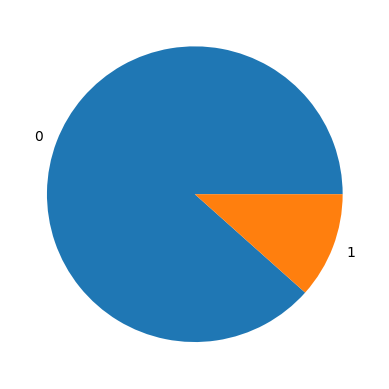

Percentage with MemoryComplaints: 11.591072714182864
                    PatientID
BehavioralProblems           
0                         557
1                         203


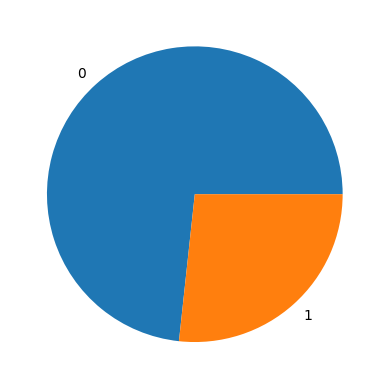

Percentage with BehavioralProblems: 26.710526315789473
                    PatientID
BehavioralProblems           
0                        1255
1                         134


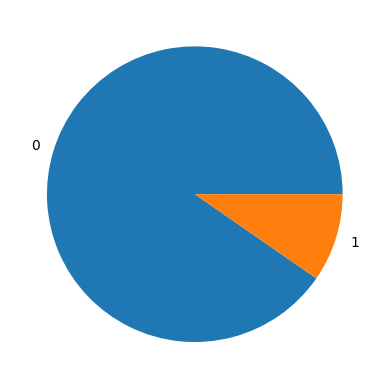

Percentage with BehavioralProblems: 9.64722822174226


In [20]:
cognitive_functional_labels = ['0', '1']
pivottable_piechart(Alzheimers, 'MemoryComplaints', 'PatientID', cognitive_functional_labels)
percentage(Alzheimers, 'MemoryComplaints', total_alzheimers)
pivottable_piechart(NonAlzheimers, 'MemoryComplaints', 'PatientID', cognitive_functional_labels)
percentage(NonAlzheimers, 'MemoryComplaints', total_nonalzheimers)
pivottable_piechart(Alzheimers, 'BehavioralProblems', 'PatientID', cognitive_functional_labels)
percentage(Alzheimers, 'BehavioralProblems', total_alzheimers)
pivottable_piechart(NonAlzheimers, 'BehavioralProblems', 'PatientID', cognitive_functional_labels)
percentage(NonAlzheimers, 'BehavioralProblems', total_nonalzheimers)

3. The percentage of patients with memory complaints are 38% in Alzheimer's group, over 3 times higher than that in non Alzheimer's group

4. The percentage of patients with behavioral problems are 27% in Alzheimer's group, almost 3 times higher than that in non Alzheimer's group

In [ ]:
#comparison of symptoms
print(Alzheimers[['Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']].describe(include='all'))
print(NonAlzheimers[['Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']].describe(include='all'))

        Confusion  Disorientation  PersonalityChanges  \
count         760             760                 760   
unique          2               2                   2   
top             0               0                   0   
freq          612             649                 653   

        DifficultyCompletingTasks  Forgetfulness  
count                         760            760  
unique                          2              2  
top                             0              0  
freq                          636            531  
        Confusion  Disorientation  PersonalityChanges  \
count        1389            1389                1389   
unique          2               2                   2   
top             0               0                   0   
freq         1096            1160                1172   

        DifficultyCompletingTasks  Forgetfulness  
count                        1389           1389  
unique                          2              2  
top                 

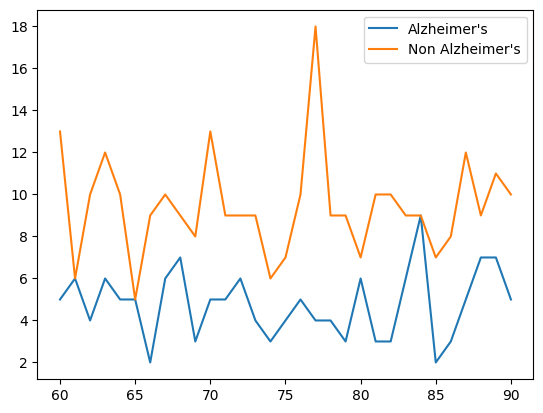

In [72]:
#confusion over ages
Alzheimers_confusion = Alzheimers[Alzheimers['Confusion'] == 1].pivot_table(index=['Age'], values=['Confusion'], aggfunc='count').reset_index()
x1 = Alzheimers_confusion['Age']
y1 = Alzheimers_confusion['Confusion']
NonAlzheimers_confusion = NonAlzheimers[NonAlzheimers['Confusion'] == 1].pivot_table(index=['Age'], values=['Confusion'], aggfunc='count').reset_index()
x2 = NonAlzheimers_confusion['Age']
y2 = NonAlzheimers_confusion['Confusion']
plt.plot(x1, y1, label="Alzheimer's")
plt.plot(x2, y2, label="Non Alzheimer's")
plt.legend()
plt.show()

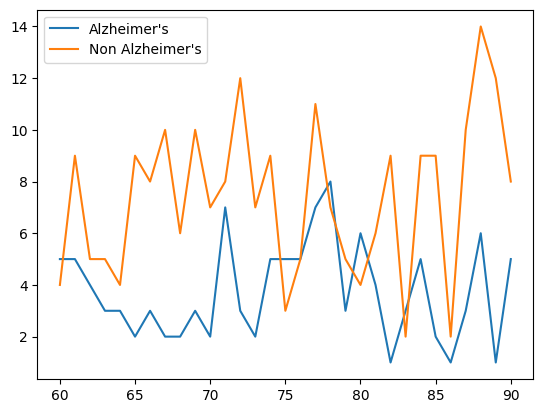

In [74]:
#disorientation over ages
Alzheimers_disorientation = Alzheimers[Alzheimers['Disorientation'] == 1].pivot_table(index=['Age'], values=['Disorientation'], aggfunc='count').reset_index()
x1 = Alzheimers_disorientation['Age']
y1 = Alzheimers_disorientation['Disorientation']
NonAlzheimers_disorientation = NonAlzheimers[NonAlzheimers['Disorientation'] == 1].pivot_table(index=['Age'], values=['Disorientation'], aggfunc='count').reset_index()
x2 = NonAlzheimers_disorientation['Age']
y2 = NonAlzheimers_disorientation['Disorientation']
plt.plot(x1, y1, label="Alzheimer's")
plt.plot(x2, y2, label="Non Alzheimer's")
plt.legend()
plt.show()

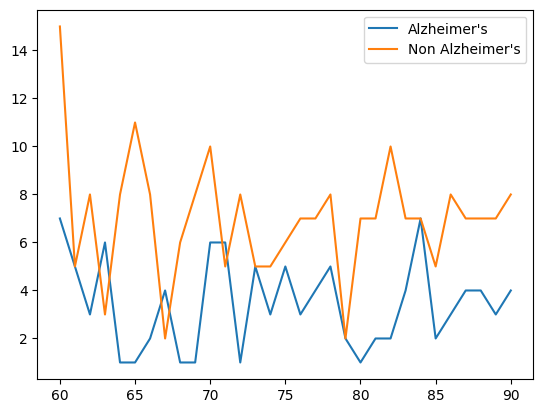

In [75]:
#personality changes over ages
Alzheimers_personality = Alzheimers[Alzheimers['PersonalityChanges'] == 1].pivot_table(index=['Age'], values=['PersonalityChanges'], aggfunc='count').reset_index()
x1 = Alzheimers_personality['Age']
y1 = Alzheimers_personality['PersonalityChanges']
NonAlzheimers_personality = NonAlzheimers[NonAlzheimers['PersonalityChanges'] == 1].pivot_table(index=['Age'], values=['PersonalityChanges'], aggfunc='count').reset_index()
x2 = NonAlzheimers_personality['Age']
y2 = NonAlzheimers_personality['PersonalityChanges']
plt.plot(x1, y1, label="Alzheimer's")
plt.plot(x2, y2, label="Non Alzheimer's")
plt.legend()
plt.show()

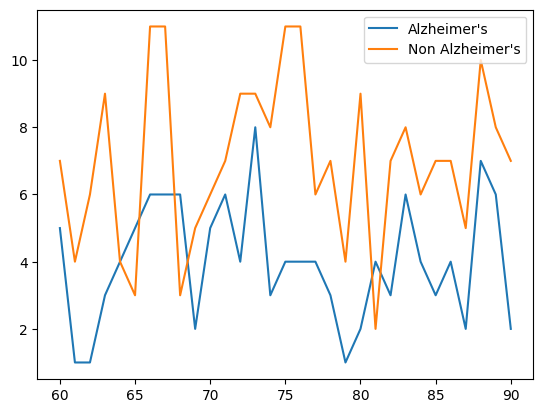

In [76]:
#difficulty completing tasks over ages
Alzheimers_tasks = Alzheimers[Alzheimers['DifficultyCompletingTasks'] == 1].pivot_table(index=['Age'], values=['DifficultyCompletingTasks'], aggfunc='count').reset_index()
x1 = Alzheimers_tasks['Age']
y1 = Alzheimers_tasks['DifficultyCompletingTasks']
NonAlzheimers_tasks = NonAlzheimers[NonAlzheimers['DifficultyCompletingTasks'] == 1].pivot_table(index=['Age'], values=['DifficultyCompletingTasks'], aggfunc='count').reset_index()
x2 = NonAlzheimers_tasks['Age']
y2 = NonAlzheimers_tasks['DifficultyCompletingTasks']
plt.plot(x1, y1, label="Alzheimer's")
plt.plot(x2, y2, label="Non Alzheimer's")
plt.legend()
plt.show()

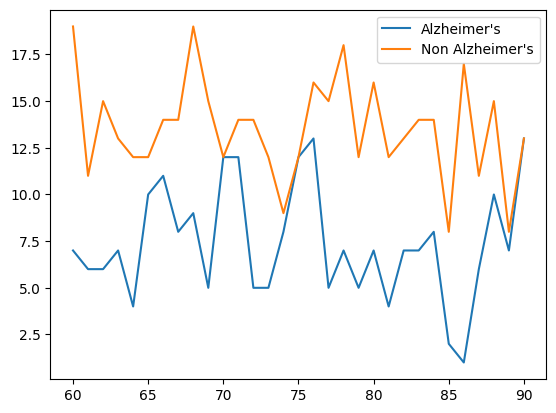

In [77]:
#forgetfulness over ages
Alzheimers_forgetfulness = Alzheimers[Alzheimers['Forgetfulness'] == 1].pivot_table(index=['Age'], values=['Forgetfulness'], aggfunc='count').reset_index()
x1 = Alzheimers_forgetfulness['Age']
y1 = Alzheimers_forgetfulness['Forgetfulness']
NonAlzheimers_forgetfulness = NonAlzheimers[NonAlzheimers['Forgetfulness'] == 1].pivot_table(index=['Age'], values=['Forgetfulness'], aggfunc='count').reset_index()
x2 = NonAlzheimers_forgetfulness['Age']
y2 = NonAlzheimers_forgetfulness['Forgetfulness']
plt.plot(x1, y1, label="Alzheimer's")
plt.plot(x2, y2, label="Non Alzheimer's")
plt.legend()
plt.show()

These symptoms are mostly slightly lower in Alzheimer's group, meaning they are not indicative of Alzheimer's Disease

           PatientID
Confusion           
0                612
1                148


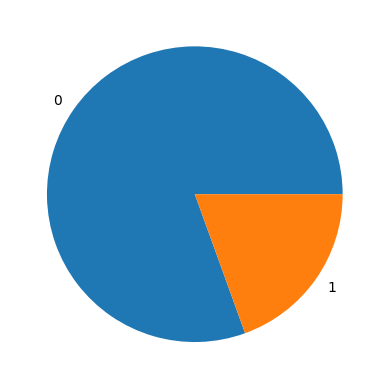

Percentage with Confusion: 19.473684210526315
           PatientID
Confusion           
0               1096
1                293


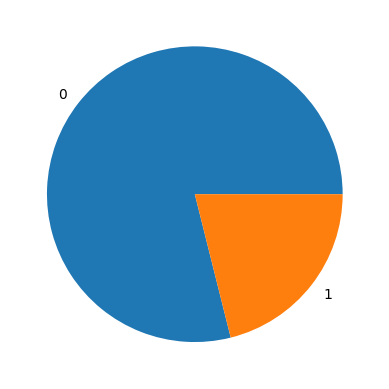

Percentage with Confusion: 21.0943124550036
                PatientID
Disorientation           
0                     649
1                     111


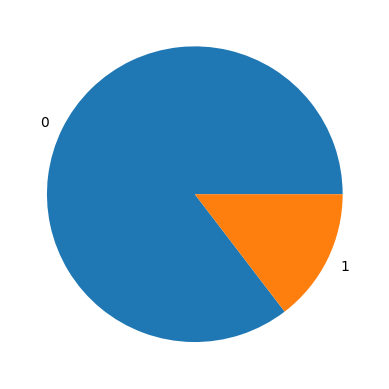

Percentage with Disorientation: 14.605263157894738
                PatientID
Disorientation           
0                    1160
1                     229


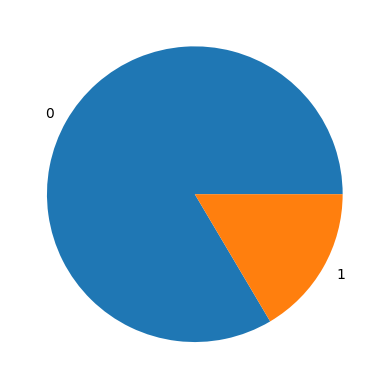

Percentage with Disorientation: 16.48668106551476
                    PatientID
PersonalityChanges           
0                         653
1                         107


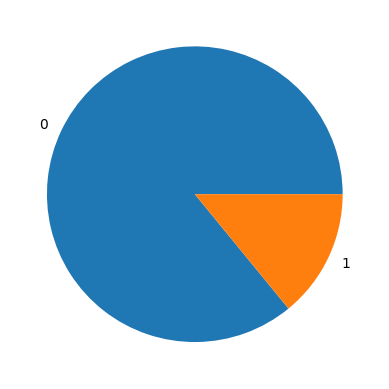

Percentage with PersonalityChanges: 14.078947368421051
                    PatientID
PersonalityChanges           
0                        1172
1                         217


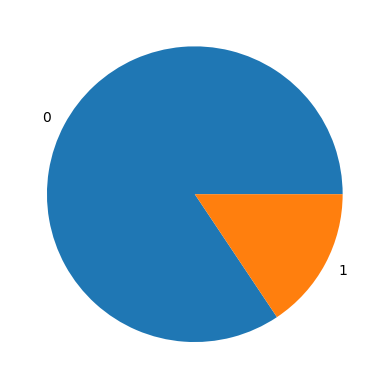

Percentage with PersonalityChanges: 15.622750179985601
                           PatientID
DifficultyCompletingTasks           
0                                636
1                                124


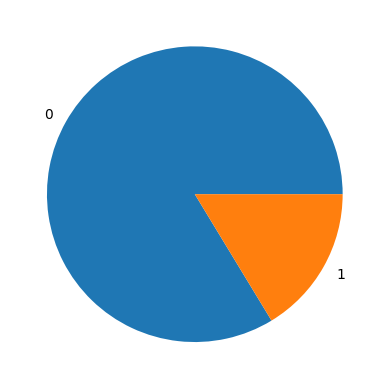

Percentage with DifficultyCompletingTasks: 16.315789473684212
                           PatientID
DifficultyCompletingTasks           
0                               1172
1                                217


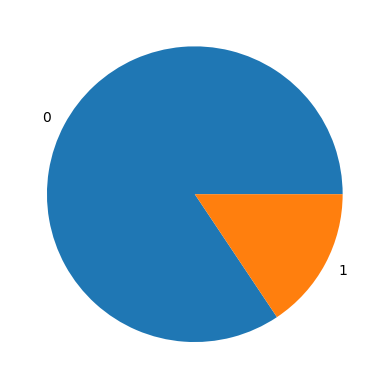

Percentage with DifficultyCompletingTasks: 15.622750179985601
               PatientID
Forgetfulness           
0                    531
1                    229


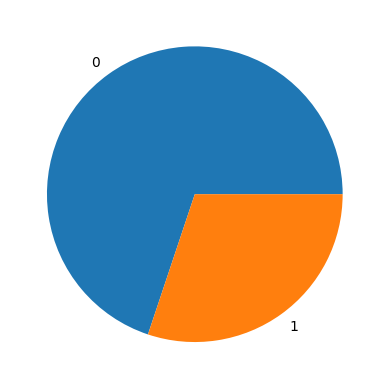

Percentage with Forgetfulness: 30.13157894736842
               PatientID
Forgetfulness           
0                    970
1                    419


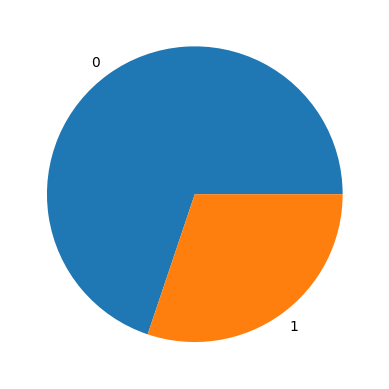

Percentage with Forgetfulness: 30.165586753059753


In [ ]:
symptons = ['Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']
symptons_labels = ['0', '1']
for i in range(5):
  pivottable_piechart(Alzheimers, symptons[i], 'PatientID', symptons_labels)
  percentage(Alzheimers, symptons[i], total_alzheimers)
  pivottable_piechart(NonAlzheimers, symptons[i], 'PatientID', symptons_labels)
  percentage(NonAlzheimers, symptons[i], total_nonalzheimers)

There is only a small difference in these factors, indicating these symptons are not unique to Alzheimer's and could not be relied on to diagnose the disease

In [ ]:
#further analysis using correlation coefficients of some variables
data[['FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'Diagnosis']].corr()

,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,Diagnosis
FamilyHistoryAlzheimers,1.000000,0.020783,-0.023106,0.000796,-0.019184,0.012920,-0.032900
CardiovascularDisease,0.020783,1.000000,-0.010134,0.006043,0.001342,-0.011760,0.031490
Diabetes,-0.023106,-0.010134,1.000000,0.003310,-0.000013,-0.000898,-0.031508
Depression,0.000796,0.006043,0.003310,1.000000,-0.007662,0.032061,-0.005893
HeadInjury,-0.019184,0.001342,-0.000013,-0.007662,1.000000,-0.016380,-0.021411
Hypertension,0.012920,-0.011760,-0.000898,0.032061,-0.016380,1.000000,0.035080
Diagnosis,-0.032900,0.031490,-0.031508,-0.005893,-0.021411,0.035080,1.000000


There is very weak correlation between the medical conditions included above and diagnosis of Alzheimer's Disease (all coefficients < 0.1)

In [ ]:
data[['CholesterolLDL', 'CholesterolTriglycerides', 'Diagnosis']].corr()

,CholesterolLDL,CholesterolTriglycerides,Diagnosis
CholesterolLDL,1.000000,-0.005582,-0.031976
CholesterolTriglycerides,-0.005582,1.000000,0.022672
Diagnosis,-0.031976,0.022672,1.000000


The same can be said about CholesterolLDL and CholesterolTriglycerides

In [ ]:
data[['MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Diagnosis']].corr()

,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Diagnosis
MMSE,1.000000,0.024932,0.007652,0.025408,0.003359,-0.237126
FunctionalAssessment,0.024932,1.000000,0.002320,-0.021941,0.053904,-0.364898
MemoryComplaints,0.007652,0.002320,1.000000,-0.009765,-0.037511,0.306742
BehavioralProblems,0.025408,-0.021941,-0.009765,1.000000,0.043376,0.224350
ADL,0.003359,0.053904,-0.037511,0.043376,1.000000,-0.332346
Diagnosis,-0.237126,-0.364898,0.306742,0.224350,-0.332346,1.000000


The coefficients of these factors are higher, even though they only range from 0.2 - 0.4, indicating only a week correlation

In [ ]:
data[['Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']].corr()

,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
Confusion,1.000000,0.007034,-0.001573,-0.022003,0.010100,-0.019186
Disorientation,0.007034,1.000000,-0.022311,-0.020767,-0.032013,-0.024648
PersonalityChanges,-0.001573,-0.022311,1.000000,0.037686,-0.013311,-0.020627
DifficultyCompletingTasks,-0.022003,-0.020767,0.037686,1.000000,-0.013386,0.009069
Forgetfulness,0.010100,-0.032013,-0.013311,-0.013386,1.000000,-0.000354
Diagnosis,-0.019186,-0.024648,-0.020627,0.009069,-0.000354,1.000000


Very low coefficients (< 0.1), indicating little/no correlation between the listed symptoms and diagnosis

##Model to predict chance of having Alzheimer's

In [ ]:
#generate model
x = data[['Age', 'Gender', 'Ethnicity', 'EducationLevel',
         'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
         'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension',
         'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
         'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL',
         'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']]
y = data['Diagnosis']
x = sm.add_constant(x)
model = sm.Logit(y, x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.368112
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Diagnosis   No. Observations:                 2149
Model:                          Logit   Df Residuals:                     2116
Method:                           MLE   Df Model:                           32
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:                  0.4334
Time:                        11:21:55   Log-Likelihood:                -791.07
converged:                       True   LL-Null:                       -1396.2
Covariance Type:            nonrobust   LLR p-value:                6.854e-234
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         5.2976      0.969      5.467      0.000       3.398       7.197
Age                          -0.0103      0.007     -1.465      0.143      -0.024       0.003
Gender                       -0.0479      0.128     -0.375      0.707      -0.298       0.202
Ethnicity                    -0.0374      0.065     -0.575      0.565      -0.165       0.090
EducationLevel               -0.0880      0.071     -1.242      0.214      -0.227       0.051
BMI                          -0.0044      0.009     -0.493      0.622      -0.022       0.013
Smoking                      -0.2138      0.142     -1.508      0.132      -0.492       0.064
AlcoholConsumption           -0.0087      0.011     -0.792      0.428      -0.030       0.013
PhysicalActivity             -0.0073      0.022     -0.332      0.740      -0.050       0.036
DietQuality                   0.0100      0.022      0.452      0.651      -0.033       0.053
SleepQuality                 -0.0554      0.036     -1.526      0.127      -0.126       0.016
FamilyHistoryAlzheimers      -0.1106      0.149     -0.745      0.456      -0.402       0.180
CardiovascularDisease         0.1676      0.176      0.952      0.341      -0.178       0.513
Diabetes                      0.0153      0.183      0.084      0.933      -0.343       0.374
Depression                    0.0661      0.156      0.423      0.672      -0.240       0.372
HeadInjury                   -0.3272      0.222     -1.472      0.141      -0.763       0.109
Hypertension                  0.1979      0.178      1.115      0.265      -0.150       0.546
SystolicBP                   -0.0007      0.002     -0.289      0.773      -0.006       0.004
DiastolicBP                   0.0019      0.004      0.518      0.605      -0.005       0.009
CholesterolTotal              0.0002      0.001      0.158      0.874      -0.003       0.003
CholesterolLDL               -0.0029      0.001     -1.959      0.050      -0.006    1.91e-06
CholesterolHDL                0.0047      0.003      1.719      0.086      -0.001       0.010
CholesterolTriglycerides      0.0007      0.001      1.175      0.240      -0.000       0.002
MMSE                         -0.1071      0.008    -13.073      0.000      -0.123      -0.091
FunctionalAssessment         -0.4482      0.026    -16.916      0.000      -0.500      -0.396
MemoryComplaints              2.5967      0.167     15.574      0.000       2.270       2.924
BehavioralProblems            2.5053      0.185     13.540      0.000       2.143       2.868
ADL                          -0.4216      0.026    -16.221      0.000      -0.473      -0.371
Confusion                    -0.1542      0.160     -0.967      0.334      -0.467       0.158
Disorientation               -0.1206      0.176     -0.687      0.492      -0.465       0.224
PersonalityChanges           -0.0711      0.182     -0.390      0.697      -0.429       0.286
DifficultyCompletingTasks     0.1008      0.1

This model has a relatively low pseudo R-squared, only able to explain 43% of the values. However, a very low LLR p-value indicates statistical significance of results

Of all the variables included, only the constant and measurements of cognitive and functional abilities are statistically significant, with p-values of 0. This is consistent with results of the analysis above

All other factors can therefore be removed from the model

In [ ]:
#remove statistically insignificant variables + evaluate model
from sklearn.model_selection import train_test_split
x = data[['MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL']]
y = data['Diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
model = sm.Logit(y_train, x_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.371441
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Diagnosis   No. Observations:                 1719
Model:                          Logit   Df Residuals:                     1713
Method:                           MLE   Df Model:                            5
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:                  0.4274
Time:                        11:22:08   Log-Likelihood:                -638.51
converged:                       True   LL-Null:                       -1115.0
Covariance Type:            nonrobust   LLR p-value:                8.863e-204
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.8896      0.260     14.982      0.000       3.381       4.398
MMSE                    -0.1115      0.009    -12.183      0.000      -0.129      -0.094
FunctionalAssessment    -0.4314      0.029    -14.944      0.000      -0.488      -0.375
MemoryComplaints         2.6586      0.189     14.078      0.000       2.288       3.029
BehavioralProblems       2.5279      0.202     12.539      0.000       2.133       2.923
ADL                     -0.4235      0.029    -14.542      0.000      -0.481      -0.366
========================================================================================
"""

The new model has a similar pseudo R-squared and a very low LLR p-value

1. Constant: Positive coefficient, meaning everyone, regardless of environmental factors and individual differences, has a chance of having Alzheimer's

2. MMSE: A low MMSE score increases chance of having Alzheimer's

3. FunctionalAssessment: A low functional assessment score increases chance of having Alzheimer's

4. MemoryComplaints: Presence of memory complaints increases chance of having Alzheimer's

5. BehavioralComplaints: Presence of behavioral complaints increases chance of having Alzheimer's

6. ADL: A low ADL score increases chance of having Alzheimer's

These results are consistent with the result of analysis above

In [ ]:
#testing using seperated x_test and y_test
predictions = model.predict(x_test)
predicted_diagnosis = np.where(predictions > 0.5, 1, 0)
print(f'Predicted results: {predicted_diagnosis}')
print(f'Acurracy: {np.mean(predicted_diagnosis == y_test)}')

Predicted results: [0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1
 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1
 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0
 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0
 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0]
Acurracy: 0.8558139534883721


Despite a low pseudo R-squared (meaning other factors should also be considered), a model using the factors present in the dataset is capable of diagnosing Alzheimer's Disease with over 80% accuracy

##Conclusion

Alzheimer's Disease is greatly associated with decreased cognitive and functional abilities

From the data of this dataset, the most reliable way to diagnose Alzheimer's is through cognitive and functional assessment

While there are some interesting differences in other factors, there is little evidence to conclude they could be considered in the diagnosis

As the model only explains about 50% of the data, more research into other factors could make this model more accurate and reliable